# BUSINESS CASE UNDERSTANDING
Goal::
The goal is to predict residential house prices based on various property
attributes such as lot size, building type, quality, condition, year built,
basement characteristics, garage features, etc.

OUTCOME:
1. Build a robust predictive model for SalePrice.
2. Understand which features influence pricing the most.
3. Provide insights for buyers/sellers for price expens.
"""



# Importing pandas, numpy, matplotlib, seaborn

What this cell does:
Loads libraries for data processing (pandas), numerical operations (numpy), and visualization (matplotlib, seaborn).

# Insights to mention:

These are the foundational libraries for EDA and ML.
seaborn enables statistical plots that help identify data patterns early.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# LOAD DATASET -- 2
Load the dataset required for performing operations on the values.

In [2]:
df = pd.read_csv("data.csv")
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# INITIAL DATA EXPLORATION -- 3
What this cell does:
Prints column names, non-null counts, and data types.
Helps identify categorical vs numerical variables.

Reveals missing values early.

Useful to detect incorrect data types (e.g., numeric stored as object).

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [5]:
df.shape[0]

1460

In [6]:
df.isnull().sum().sum()

7829

# DOMAIN ANALYSIS:

Variables include:
- Structural features (OverallQual, GrLivArea, TotalBsmtSF)
- Location attributes (Neighborhood)
- Utilities and property conditions (ExterQual, HeatingQC)
- Amenities (Garage, Basement, Fireplace)
- Year-based features (YearBuilt, YrSold)
- Target variable: SalePrice

House prices depend heavily on quality, area, neighborhood, and condition.

# EXPLORATORY DATA ANALYSIS (EDA) VISUAL -- 4

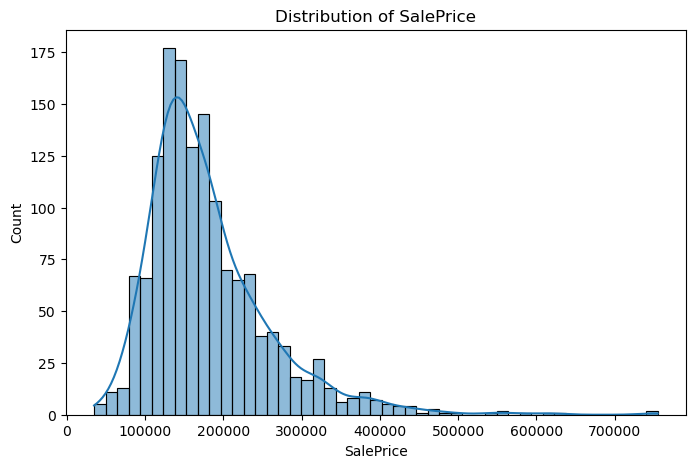

In [7]:
# Histogram of target
plt.figure(figsize=(8,5))
sns.histplot(df['SalePrice'], kde=True)
plt.title("Distribution of SalePrice")
plt.show()

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
GarageYrBlt     0.486362
MasVnrArea      0.477493
Fireplaces      0.466929
BsmtFinSF1      0.386420
LotFrontage     0.351799
WoodDeckSF      0.324413
2ndFlrSF        0.319334
OpenPorchSF     0.315856
HalfBath        0.284108
Name: SalePrice, dtype: float64

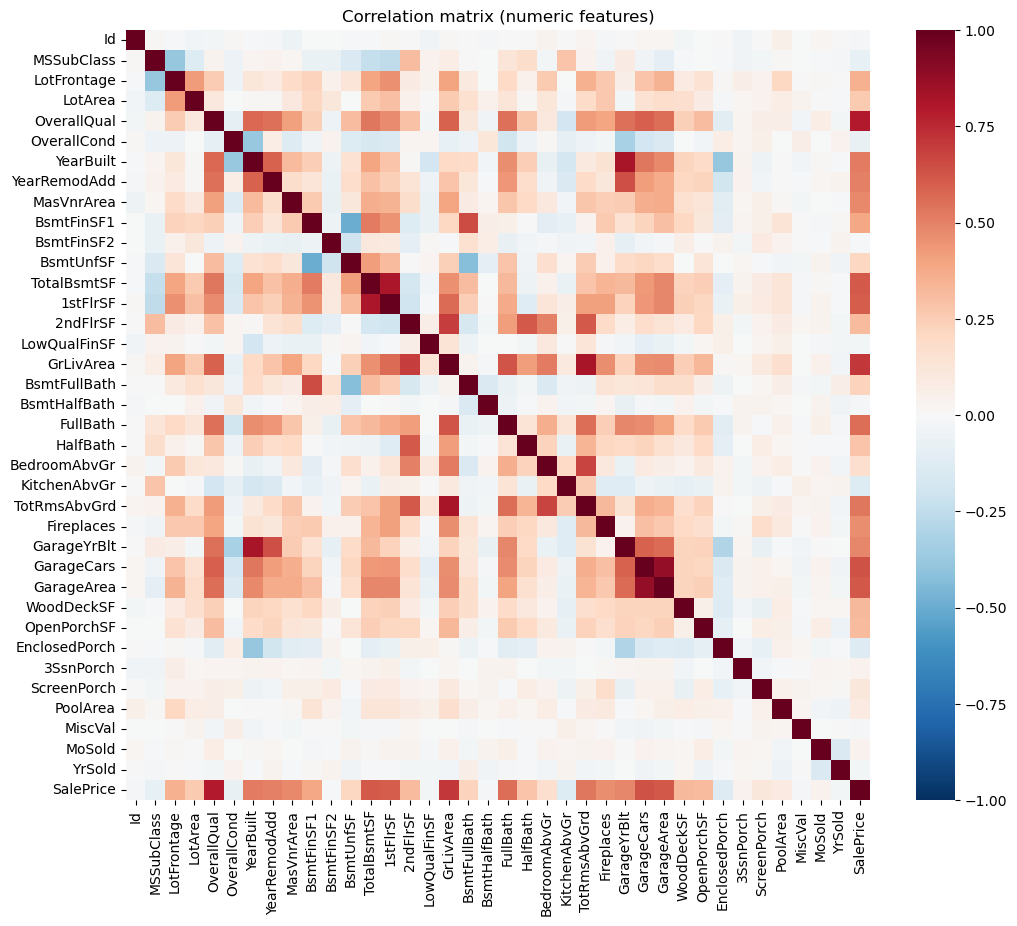

In [8]:
# Correlation matrix of numeric features (show top correlated with SalePrice)
num_df = df.select_dtypes(include=['int64','float64']).copy()
corr_with_target = num_df.corr()['SalePrice'].abs().sort_values(ascending=False)
display(corr_with_target.head(20))

plt.figure(figsize=(12,10))
sns.heatmap(num_df.corr(), cmap='RdBu_r', center=0, vmin=-1, vmax=1)
plt.title('Correlation matrix (numeric features)')
plt.show()

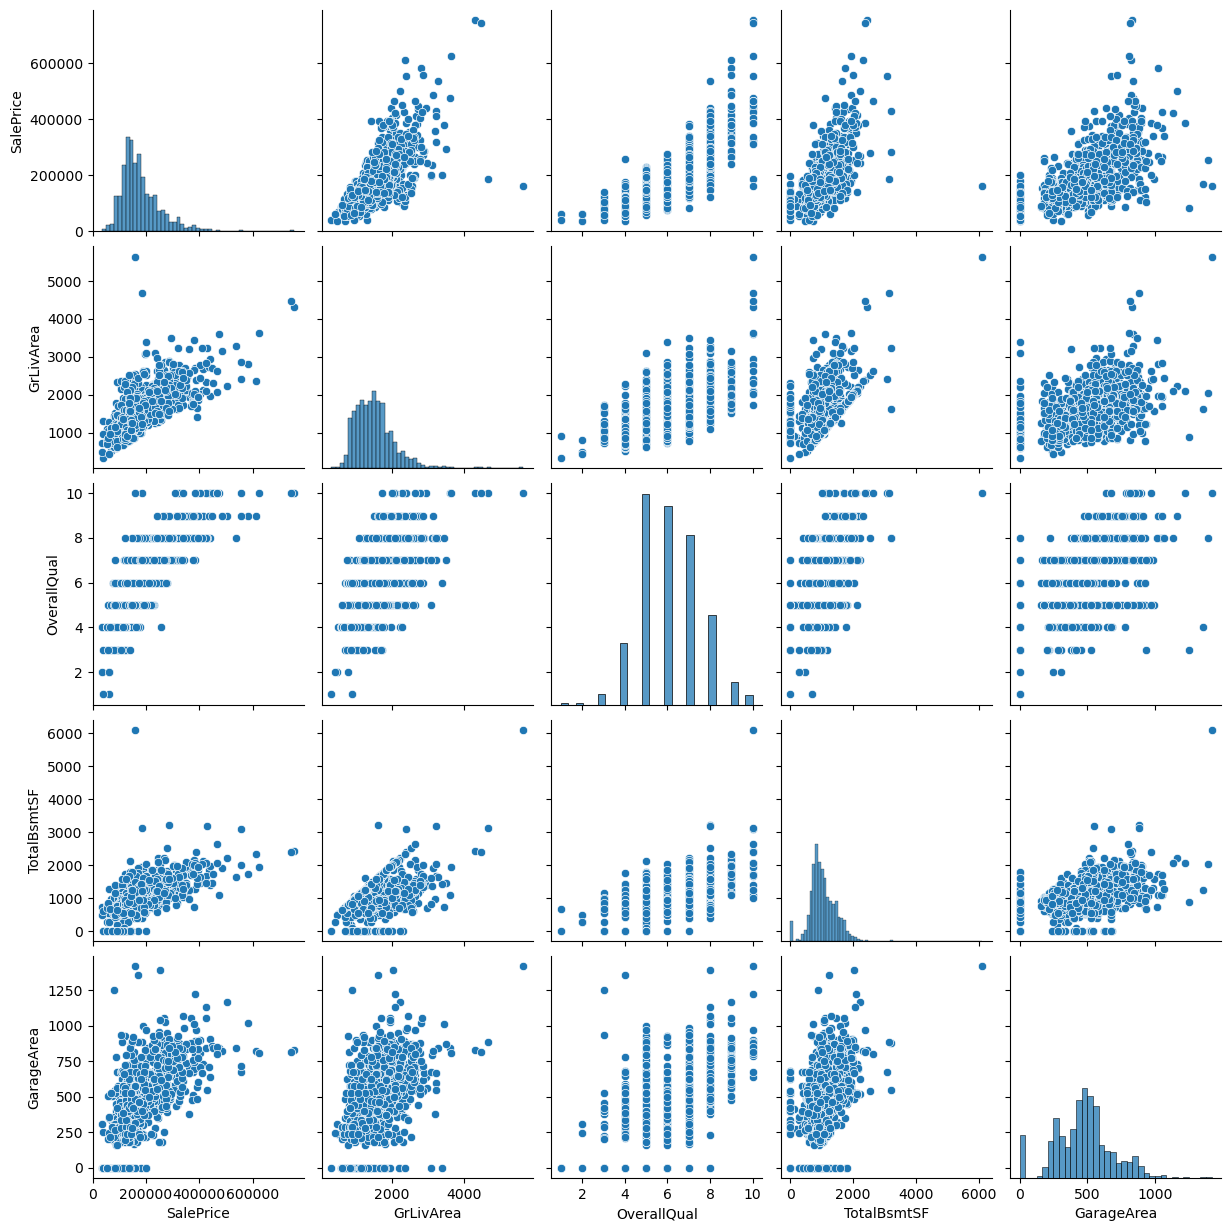

In [9]:
# Pairplot for important features
important = ['SalePrice','GrLivArea','OverallQual','TotalBsmtSF','GarageArea']
sns.pairplot(df[important])
plt.show()

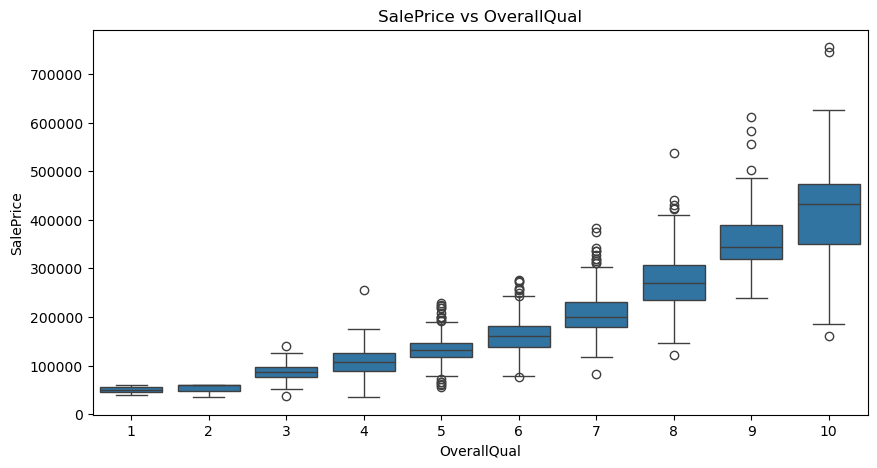

In [10]:
# Boxplot: SalePrice vs OverallQual
plt.figure(figsize=(10,5))
sns.boxplot(x=df['OverallQual'], y=df['SalePrice'])
plt.title("SalePrice vs OverallQual")
plt.show()

INSIGHTS:
1. SalePrice is right-skewed, indicating high-value luxury homes.
2. Highest correlations: OverallQual, GrLivArea, GarageCars, TotalBsmtSF.
3. Quality is the strongest driver of price.
4. Neighborhood affects price segmentation (clusters visible in pairplots).

# DATA PREPROCESSING -- 5
# 5.1 Handling Null Values
What these cells do:
Detect and handle missing values using:

Median imputation for numerical
Mode imputation for categorical
Drop columns if missing too much

Insights to mention:

Correct imputation preserves dataset size.
Some columns with >40% missing values often give no value and can be dropped.
Rechecking null counts after imputation confirms correctness.

In [11]:
#Check the null values 
df.isnull().sum() 

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [43]:
# MasVnrArea: NA means no masonry
df["MasVnrArea"] = df["MasVnrArea"].fillna(0)

In [44]:
# LotFrontage: fill with median per neighborhood
df["LotFrontage"] = df.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median())
)

In [45]:
# GarageYrBlt: missing => no garage, fill with 0
df["GarageYrBlt"] = df["GarageYrBlt"].fillna(0)

In [46]:
#Check Again for missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 84 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          1460 non-null   object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

# 5.2 Handling OUTLIERS

IQR Method

3-sigma (Z-score)

Removal of extreme values (example: GrLivArea > 4000)
What these cells do:
Detects outliers using IQR or z-score and removes extreme values.

Insights to mention:

Outliers distort models like Linear Regression.
Removing points with unrealistic living area or price improves model accuracy.
Must be careful not to remove legitimate luxury homes without logic support.

In [51]:
num_cols = df.select_dtypes(include=[np.number]).columns

In [52]:
outlier_summary = {}

for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    
    outliers = df[(df[col] < lower) | (df[col] > upper)]
    outlier_summary[col] = len(outliers)

outlier_summary

{'Id': 0,
 'MSSubClass': 103,
 'LotFrontage': 93,
 'LotArea': 69,
 'OverallQual': 2,
 'OverallCond': 125,
 'YearBuilt': 7,
 'YearRemodAdd': 0,
 'MasVnrArea': 98,
 'BsmtFinSF1': 7,
 'BsmtFinSF2': 167,
 'BsmtUnfSF': 29,
 'TotalBsmtSF': 61,
 '1stFlrSF': 20,
 '2ndFlrSF': 2,
 'LowQualFinSF': 26,
 'GrLivArea': 31,
 'BsmtFullBath': 1,
 'BsmtHalfBath': 82,
 'FullBath': 0,
 'HalfBath': 0,
 'BedroomAbvGr': 35,
 'KitchenAbvGr': 68,
 'TotRmsAbvGrd': 30,
 'Fireplaces': 5,
 'GarageYrBlt': 81,
 'GarageCars': 5,
 'GarageArea': 21,
 'WoodDeckSF': 32,
 'OpenPorchSF': 77,
 'EnclosedPorch': 208,
 '3SsnPorch': 24,
 'ScreenPorch': 116,
 'PoolArea': 7,
 'MiscVal': 52,
 'MoSold': 0,
 'YrSold': 0,
 'SalePrice': 61,
 'SalePrice_log': 28,
 'GrLivArea_log': 10,
 'LotArea_log': 132}

In [53]:
from scipy import stats

z_outliers = {}

for col in num_cols:
    z = np.abs(stats.zscore(df[col].fillna(df[col].median())))
    z_outliers[col] = (z > 3).sum()

z_outliers


{'Id': 0,
 'MSSubClass': 30,
 'LotFrontage': 15,
 'LotArea': 13,
 'OverallQual': 2,
 'OverallCond': 28,
 'YearBuilt': 6,
 'YearRemodAdd': 0,
 'MasVnrArea': 32,
 'BsmtFinSF1': 6,
 'BsmtFinSF2': 50,
 'BsmtUnfSF': 11,
 'TotalBsmtSF': 10,
 '1stFlrSF': 12,
 '2ndFlrSF': 4,
 'LowQualFinSF': 20,
 'GrLivArea': 16,
 'BsmtFullBath': 16,
 'BsmtHalfBath': 82,
 'FullBath': 0,
 'HalfBath': 12,
 'BedroomAbvGr': 14,
 'KitchenAbvGr': 68,
 'TotRmsAbvGrd': 12,
 'Fireplaces': 5,
 'GarageYrBlt': 81,
 'GarageCars': 0,
 'GarageArea': 7,
 'WoodDeckSF': 22,
 'OpenPorchSF': 27,
 'EnclosedPorch': 51,
 '3SsnPorch': 23,
 'ScreenPorch': 55,
 'PoolArea': 7,
 'MiscVal': 8,
 'MoSold': 0,
 'YrSold': 0,
 'SalePrice': 22,
 'SalePrice_log': 12,
 'GrLivArea_log': 8,
 'LotArea_log': 33}

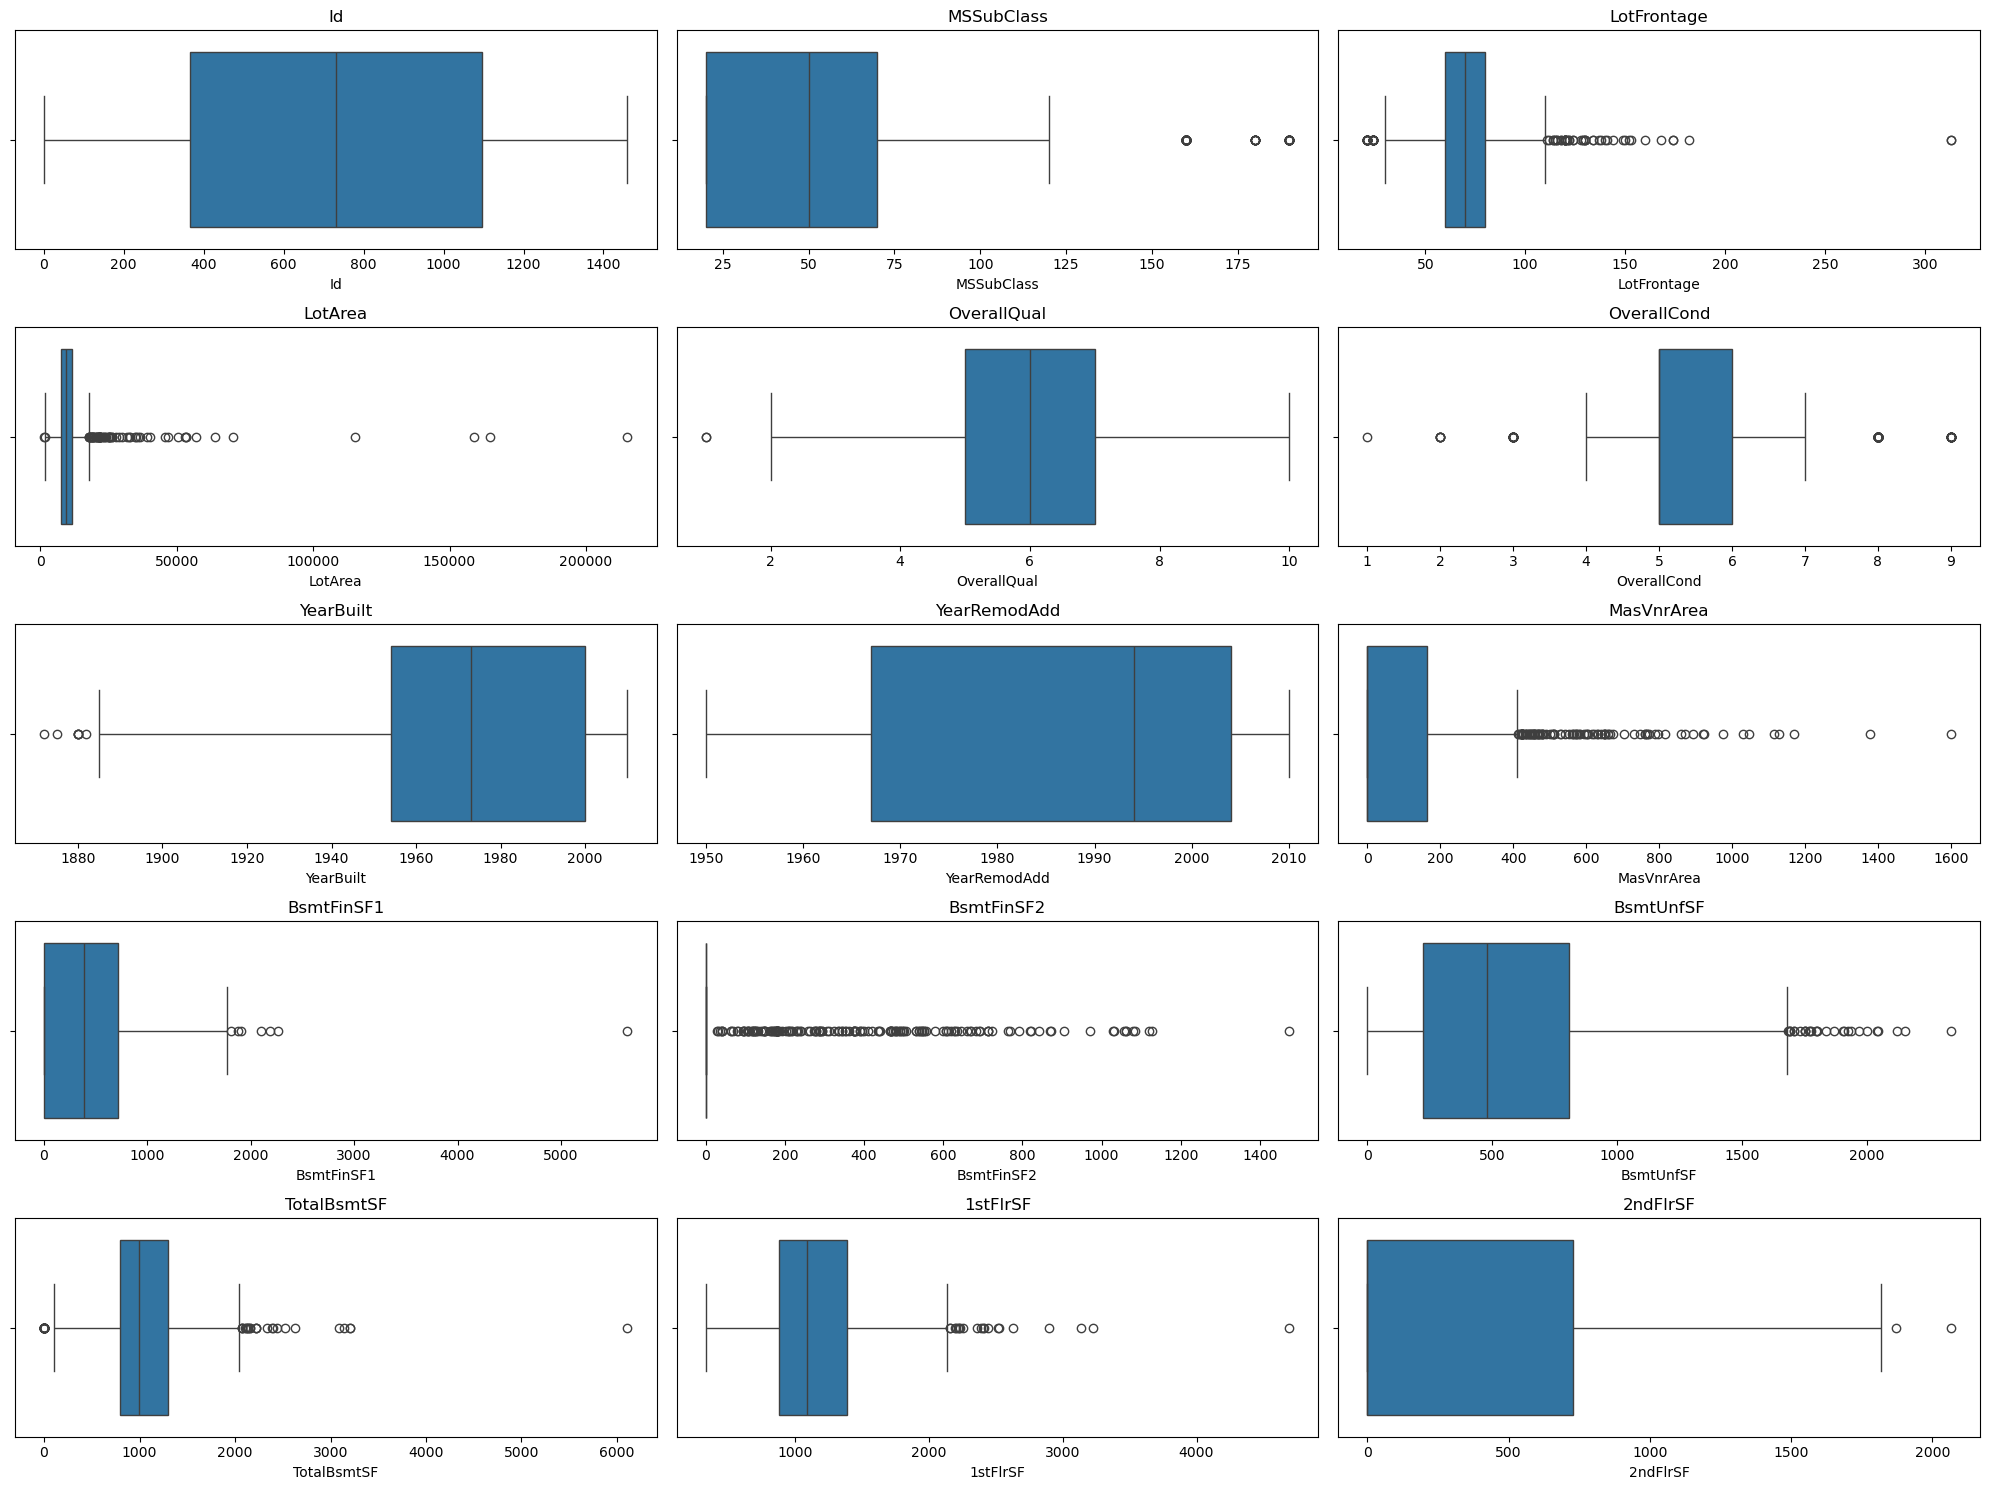

In [54]:
plt.figure(figsize=(20, 15))

for i, col in enumerate(num_cols[:15], 1):
    plt.subplot(5, 3, i)
    sns.boxplot(x=df[col])
    plt.title(col)

plt.tight_layout()
plt.show()

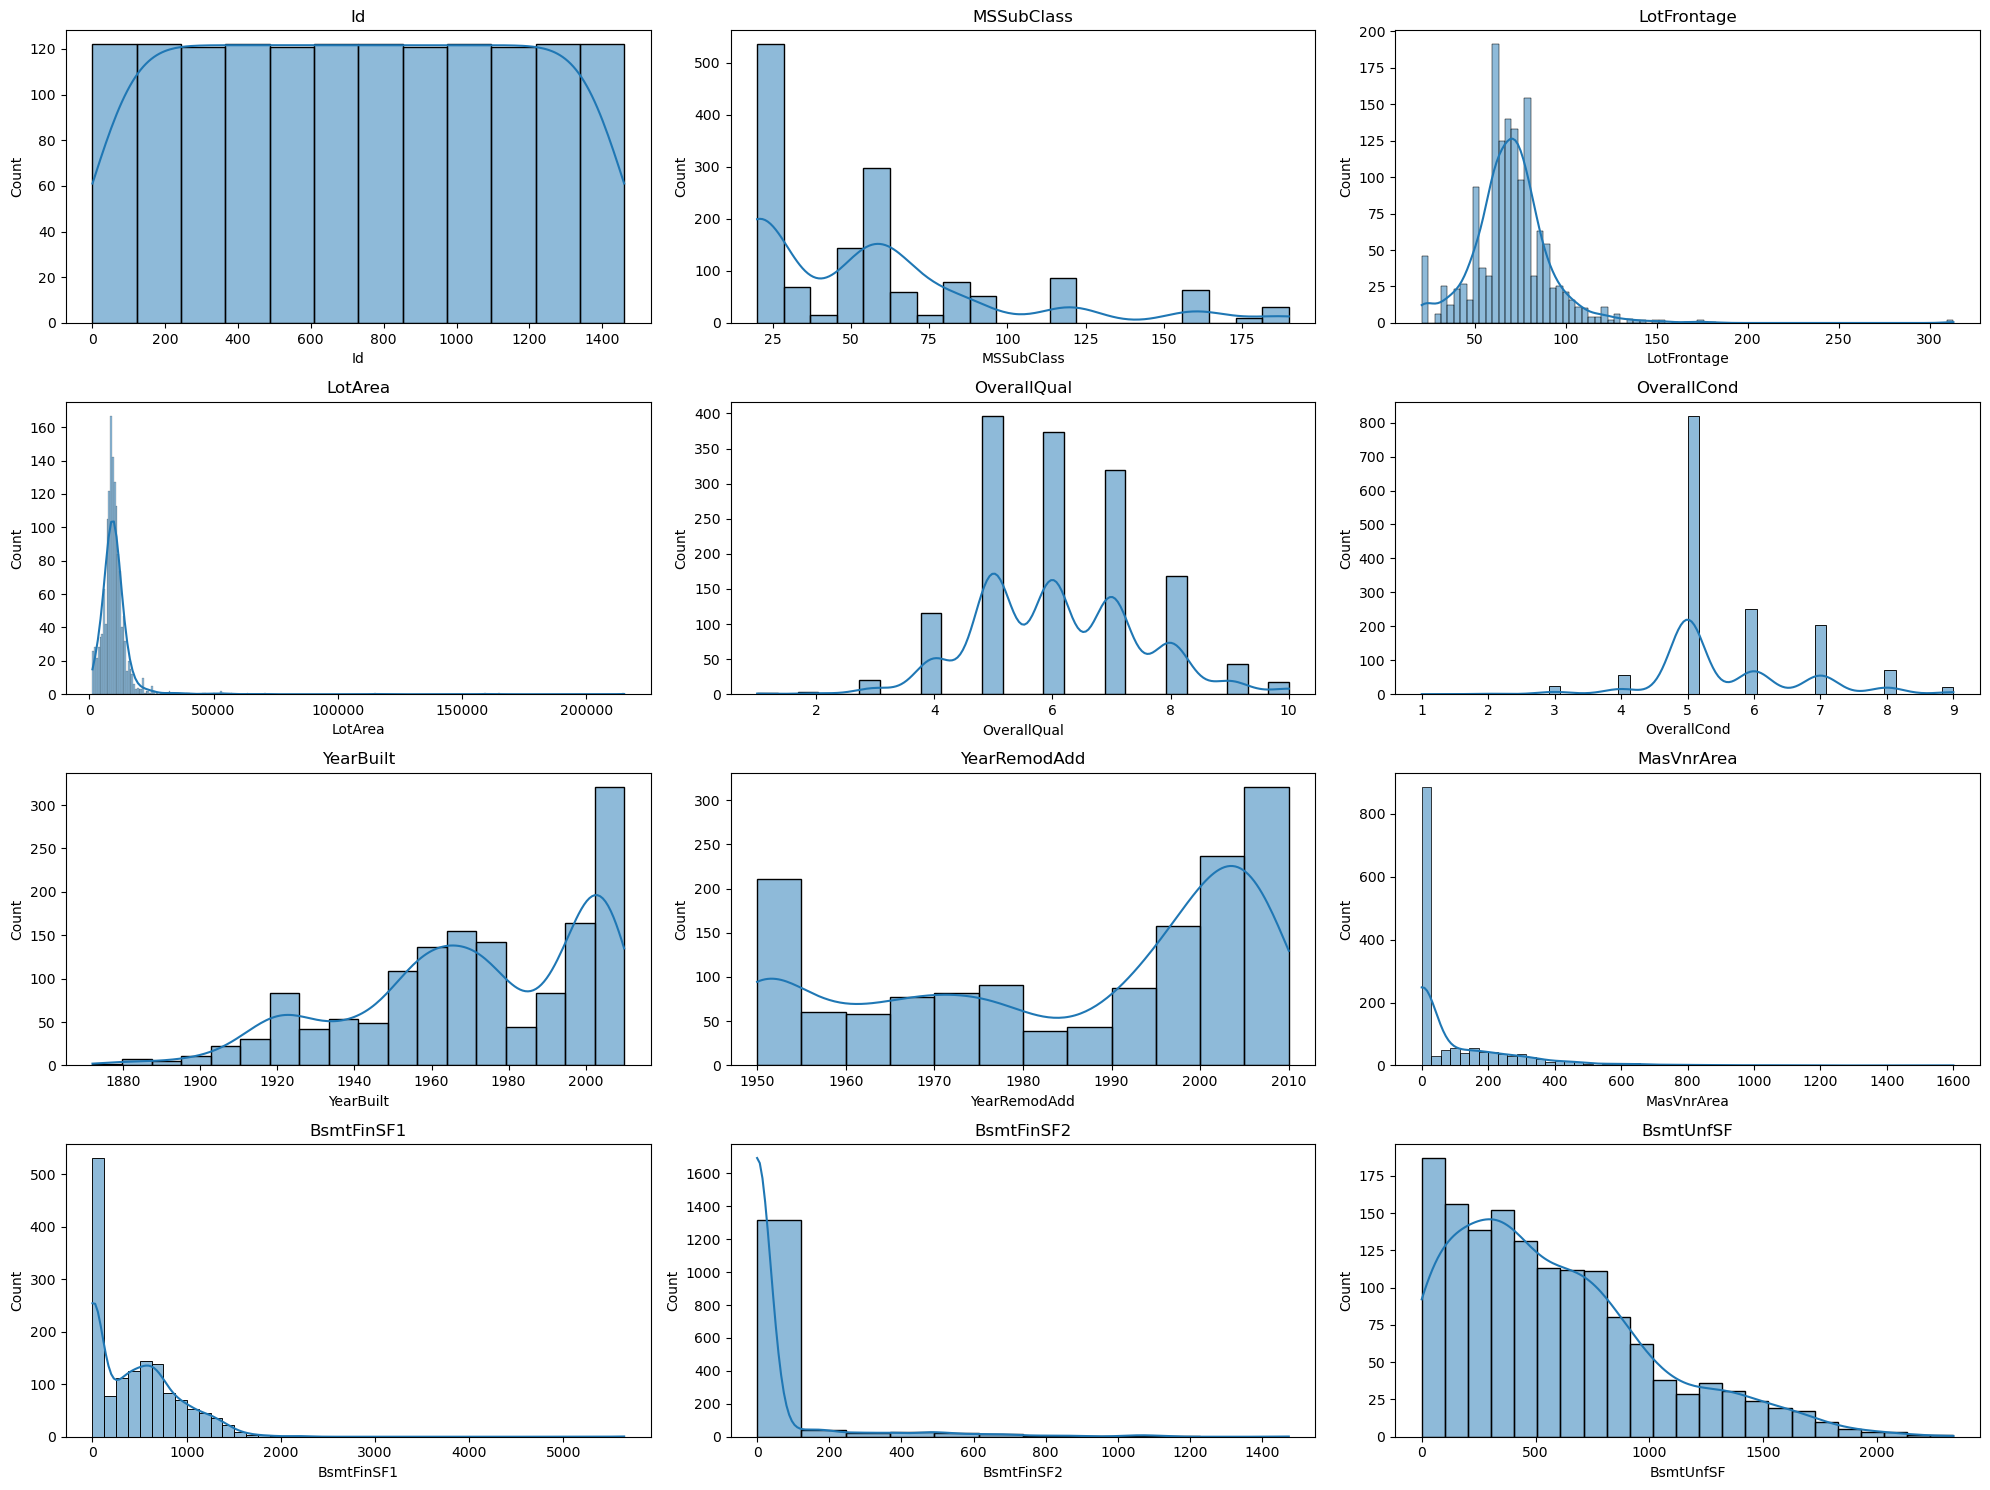

In [55]:
plt.figure(figsize=(20, 15))

for i, col in enumerate(num_cols[:12], 1):
    plt.subplot(4, 3, i)
    sns.histplot(df[col], kde=True)
    plt.title(col)

plt.tight_layout()
plt.show()

In [56]:
def remove_outliers_iqr(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return df[(df[col] >= lower) & (df[col] <= upper)]

df_clean = df.copy()
for col in num_cols:
    df_clean = remove_outliers_iqr(df_clean, col)

df_clean.shape

(474, 84)

In [57]:
def cap_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    
    df[col] = np.where(df[col] < lower, lower, df[col])
    df[col] = np.where(df[col] > upper, upper, df[col])
    return df

df_capped = df.copy()
for col in num_cols:
    df_capped = cap_outliers(df_capped, col)


In [58]:
import numpy as np

skewed_cols = ["SalePrice", "GrLivArea", "LotArea"]

for col in skewed_cols:
    df[col+"_log"] = np.log1p(df[col])


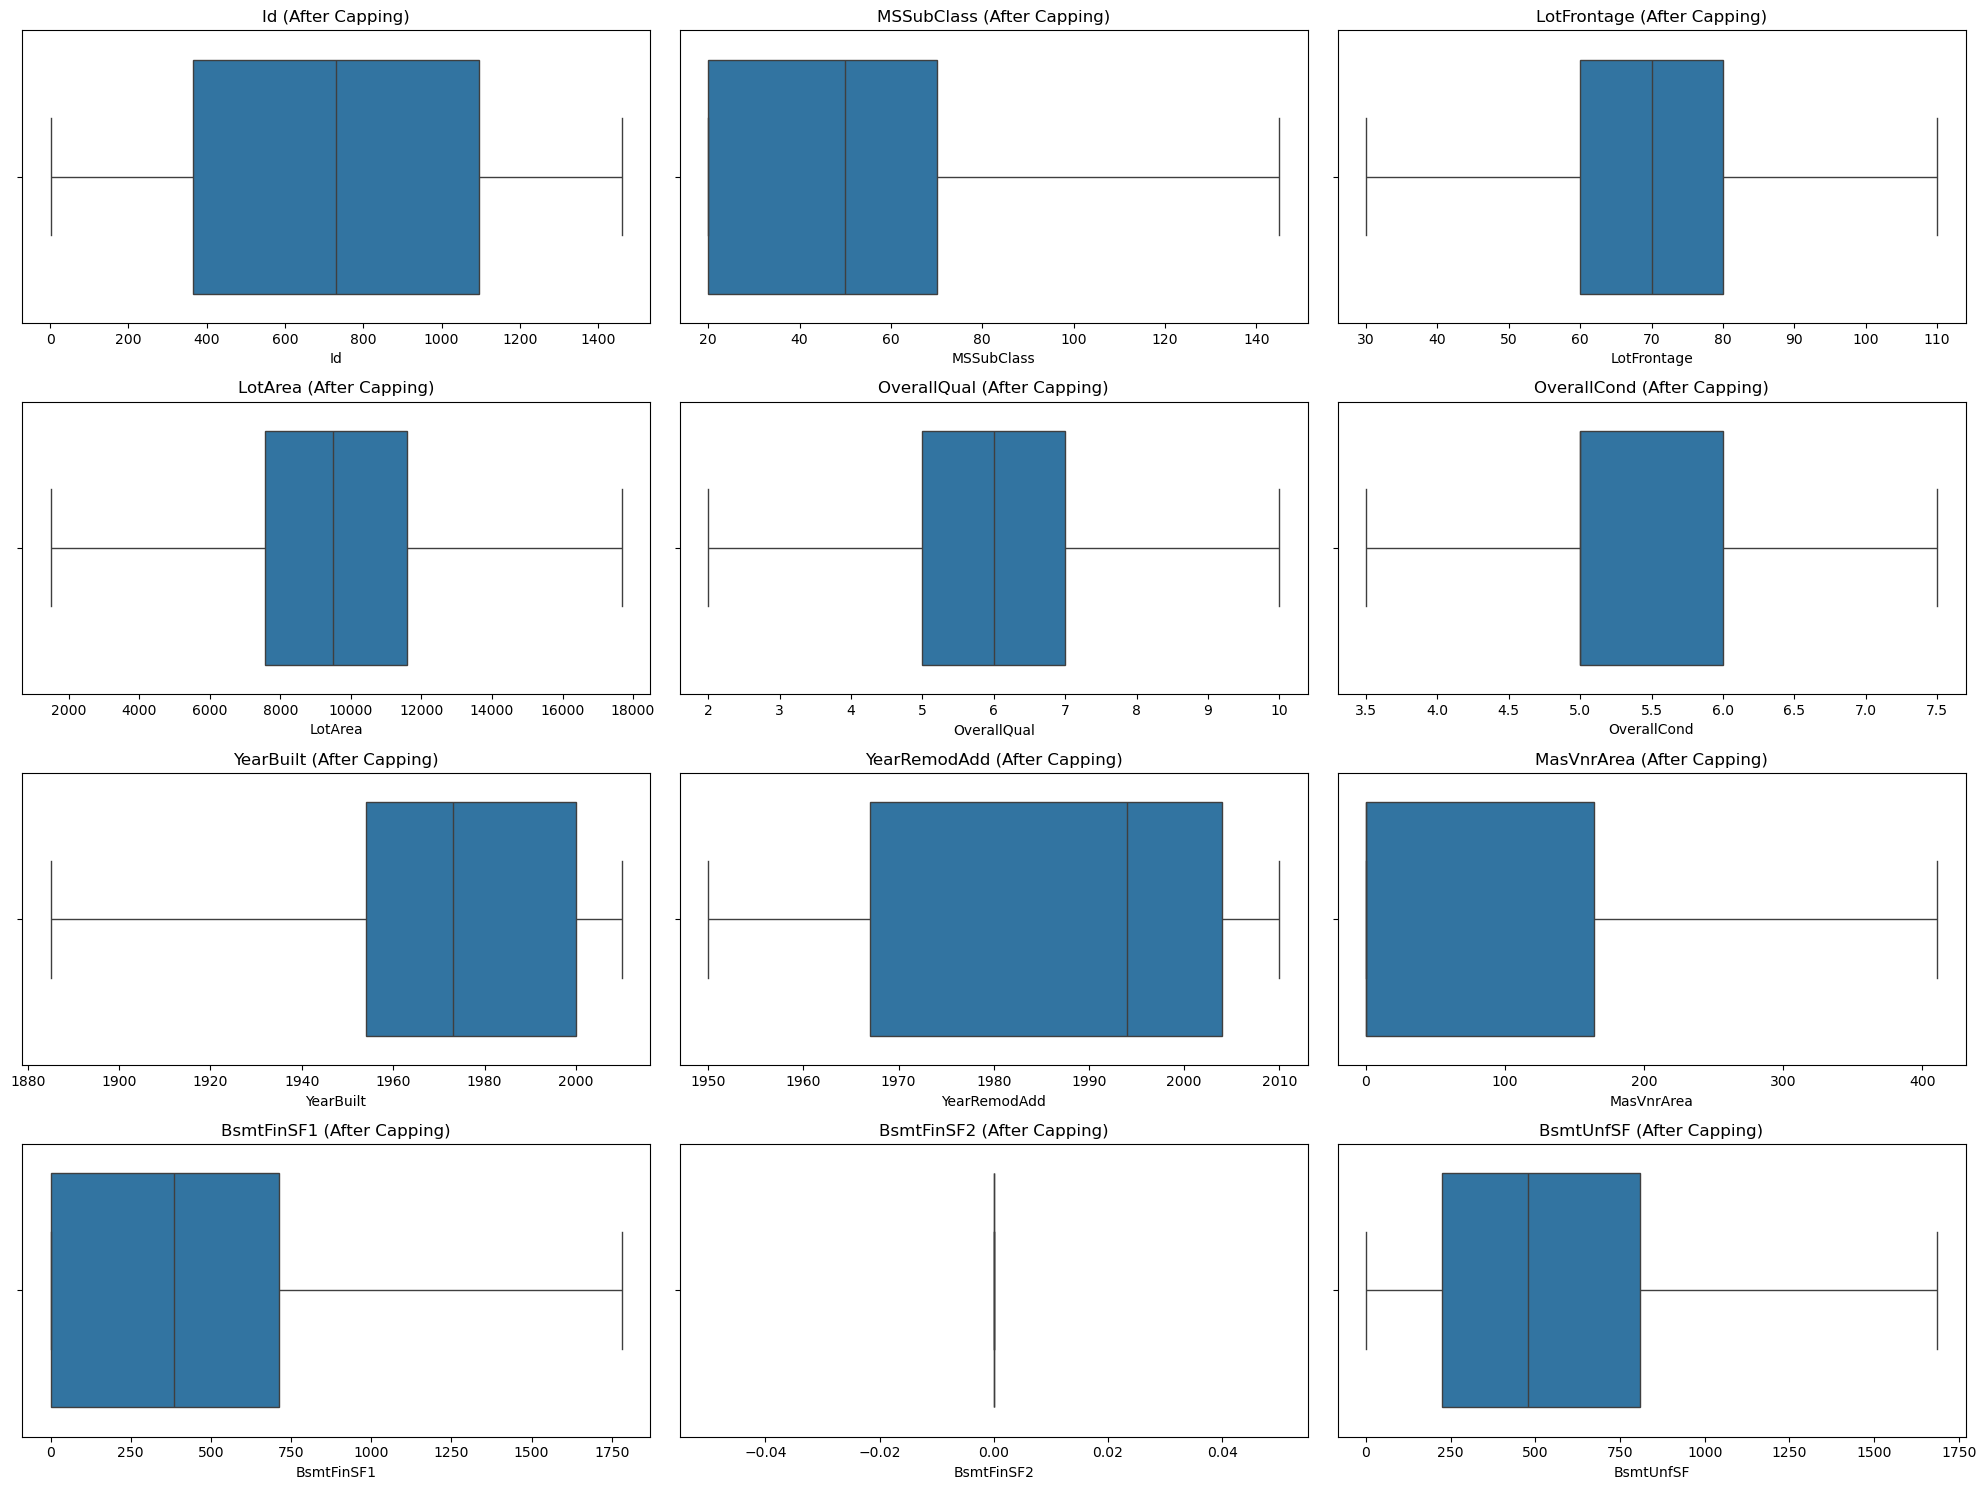

In [59]:
plt.figure(figsize=(20, 15))

for i, col in enumerate(num_cols[:12], 1):
    plt.subplot(4, 3, i)
    sns.boxplot(x=df_capped[col])
    plt.title(col + " (After Capping)")

plt.tight_layout()
plt.show()


# 5.3 Handling Categorical Values

In [60]:
none_fill_cols = [
    "Alley", "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", 
    "BsmtFinType2", "FireplaceQu", "GarageType", "GarageFinish",
    "GarageQual", "GarageCond", "MasVnrType", "PoolQC", "Fence", "MiscFeature"
]

for col in none_fill_cols:
    df[col] = df[col].fillna("None")


In [61]:
df.isnull().sum().sort_values(ascending=False).head()

Electrical      1
KitchenQual     0
GarageCars      0
GarageFinish    0
GarageYrBlt     0
dtype: int64

In [62]:
cat_cols = df.select_dtypes(include=["object"]).columns
cat_cols


Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

# One-Hot Encoding (Nominal)
# These are non-ordered categorical features such as:
MSZoning,,
Neighborhood,
HouseStyle,
Exterior1st,
Exterior2nd,
SaleType,
SaleCondition,
Overall many others.

What these cells do:
Use OneHotEncoder, StandardScaler, ColumnTransformer to prepare features.

Insights to mention:

One-hot encoding prevents category ordering assumptions.
Scaling standardizes numerical features for models sensitive to magnitude.
Using ColumnTransformer prevents data leakage by fitting only on training data.

In [63]:
df_encoded = pd.get_dummies(df, columns=cat_cols, drop_first=True)

df_encoded.head()


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,False,False,False,False,True,False,False,False,True,False
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,False,False,False,False,True,False,False,False,True,False
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,False,False,False,False,True,False,False,False,True,False
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,False,False,False,False,True,False,False,False,False,False
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,False,False,False,False,True,False,False,False,True,False


In [64]:
df_encoded.shape

(1460, 264)

# PERFORM TRAIN TEST SPLIT -- 6
What this cell does:
Splits dataset into training (80%) and testing (20%).

Insights to mention:
Prevents overfitting by evaluating on unseen data.
Ensures model generalizes well outside training samples.

In [65]:
X = df_encoded.drop("SalePrice", axis=1)
y = df_encoded["SalePrice"]

In [78]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=TEST_SIZE, random_state=RANDOM_STATE
)

In [79]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (1168, 263)
X_test shape: (292, 263)
y_train shape: (1168,)
y_test shape: (292,)


In [80]:
X_train.shape, X_test.shape


((1168, 263), (292, 263))

In [87]:
cat_cols = df.select_dtypes(include=["object"]).columns.tolist()
df_encoded = pd.get_dummies(df, columns=cat_cols, drop_first=True)

# SELECTING BEST MODEL FOR THE BEST RMSE SCORE -- 7
What these cells do:
Train regression models and evaluate using:

RMSE

R² Score

Insights to mention:

Ridge handles multicollinearity well.
Lasso helps feature selection by eliminating less important variables.
Linear Regression may struggle with skewed data unless transformed.

In [134]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, HistGradientBoostingRegressor
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
import joblib

In [135]:
results = {}
models = {}

In [137]:
# 1) Linear Regression — requires scaling
lr_pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("model", LinearRegression())
])
lr_pipe.fit(X_train, y_train)
pred = lr_pipe.predict(X_test)

results["LinearRegression"] = {
    "RMSE": mean_squared_error(y_test, pred, squared=False),
    "R2": r2_score(y_test, pred)
}
models["LinearRegression"] = lr_pipe


In [138]:
# 2) Random Forest — tuned lightly
rf = RandomForestRegressor(random_state=RANDOM_STATE, n_jobs=-1)

rf_param = {
    "n_estimators": [100, 200, 300],
    "max_depth": [8, 12, None],
    "min_samples_split": [2, 5],
    "min_samples_leaf": [1, 2]
}

rf_search = RandomizedSearchCV(
    rf, rf_param, n_iter=8, cv=3, random_state=RANDOM_STATE,
    scoring="neg_root_mean_squared_error", n_jobs=-1
)
rf_search.fit(X_train, y_train)
best_rf = rf_search.best_estimator_

pred = best_rf.predict(X_test)
results["RandomForest"] = {
    "RMSE": mean_squared_error(y_test, pred, squared=False),
    "R2": r2_score(y_test, pred)
}
models["RandomForest"] = best_rf

In [139]:
# 3) Gradient Boosting Model (Fallback if XGBoost not installed)
gb = HistGradientBoostingRegressor(random_state=RANDOM_STATE)
gb.fit(X_train, y_train)

pred = gb.predict(X_test)
results["HistGradientBoosting"] = {
    "RMSE": mean_squared_error(y_test, pred, squared=False),
    "R2": r2_score(y_test, pred)
}
models["HistGradientBoosting"] = gb

In [141]:
results_df = pd.DataFrame(results).T
print("\nMODEL PERFORMANCE:\n")
print(results_df)


MODEL PERFORMANCE:

                              RMSE            R2
LinearRegression      3.188201e+14 -1.325188e+19
RandomForest          8.714860e+03  9.900984e-01
HistGradientBoosting  1.778881e+04  9.587447e-01


In [142]:
best_model_name = min(results, key=lambda x: results[x]["RMSE"])
print("\nBEST MODEL:", best_model_name)
print("RMSE:", results[best_model_name]["RMSE"])
print("R2:", results[best_model_name]["R2"])



BEST MODEL: RandomForest
RMSE: 8714.86015094983
R2: 0.990098362781566


# MODEL TRAINING -- 7
Random Forest is an ensemble method that builds multiple decision trees and averages their predictions.
It automatically handles:
Non-linear patterns
Interactions between features
Outliers more effectively
Usually gives higher accuracy compared to linear models.

Insights to mention:

Random Forest reduces overfitting due to averaging across many trees.
Feature importance from Random Forest helps identify the strongest predictors of house prices.
It typically outperforms Linear Regression for housing datasets because real-estate data is rarely linear.

In [143]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)

# Random Forest
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

# Define Models

In [144]:
from sklearn.metrics import mean_squared_error, r2_score

# Linear Regression Predictions
pred_lr = lr.predict(X_test)

print("LR RMSE:", np.sqrt(mean_squared_error(y_test, pred_lr)))
print("LR R2:", r2_score(y_test, pred_lr))

# Random Forest Predictions
pred_rf = rf.predict(X_test)

print("RF RMSE:", np.sqrt(mean_squared_error(y_test, pred_rf)))
print("RF R2:", r2_score(y_test, pred_rf))


LR RMSE: 65950.38779611819
LR R2: 0.43295062909020476
RF RMSE: 8928.25946564189
RF R2: 0.9896075062607986
